<ins>CleanData</ins>: contains all the methods responsible for cleaning data, such as: replacing symbols, standardizing letters, and converting data types. <br/>


<ins>ExploreData</ins>: contains methods responsible for exploring data such as printing summary information.<br/>


<ins>PreprocessData</ins>: contains methods responsible for preprocessing data, such as encoding/scaling catagorical/numerical variables. <br/>

In [1]:
class CleanData():

    def __init__(self):                
        """ Implements methods that will be used by a superclass to clean data.

            Public interface:
                replace_these_symbols_in_these_cols(replace_dic)
                standardize_letters_in_cat_cols()
                convert_the_type_of_these_cols(dic)
                drop_these_cols(dic)
                handleNaN()
        """    
    def replace_these_symbols_in_these_cols(self, replace_dic):
        self._replace_these_symbols_in_these_cols(replace_dic)  

    def standardize_letters_in_cat_cols(self, cols):
        self._standardize_letters_in_cat_cols(cols)      
    
    def convert_the_type_of_these_cols(self, dic):
        self._convert_the_type_of_these_cols(dic)

    def handleNaN(self):
        self._handleNaN()
    
    # Private methods (abstracted out)
    def _replace_these_symbols_in_these_cols(self, replace_dic):        
        for col, symbols in replace_dic.items():
            try:        
                self.data[col] = self.data[col].str.replace(symbols[0], symbols[1])
            except:
                print('In col {}, {} cannot be replaced with {}'.format(col, symbols[0], symbols[1]))
               
    def _convert_the_type_of_these_cols(self, dic):
        for col, cast_to_type in dic.items():
            try:
                self.data[col] = self.data[col].astype(cast_to_type)
            except:
                print('Cannot convert col {} to type {}'.format(col, cast_to_type))


    def _standardize_letters_in_cat_cols(self, cols):
        for col in cols:
            try:
                print('col=', col)
                self.data[col] = self.data[col].str.lower()
            except:
                print('failed in standarizing col{}'.format(col))
    
    def _handleNaN(self):
        num_cols = self.data.select_dtypes(exclude='object').columns
        cat_cols = self.data.select_dtypes(include='object').columns
        self.data[cat_cols] = self.data[cat_cols].apply(lambda col: col.fillna(col.mode()[0]))
        self.data[num_cols] = self.data[num_cols].apply(lambda col: col.fillna(col.median()))

In [2]:
class ExploreData():

    def __init__(self):
        """
        This class will contain ALL the functions that may be used to explore data. These include:
            print_summary_info()
            plot_histogram(cols)
        """

    def print_summary_info(self, how_detailed=0, print_some_samples=False):
        """
        This function prints summary information about the ds, including: 
            feature name, data type, number of missing values and ten samples of each feature
        """
         
        if how_detailed == 0:
            print("The dataset now has {} rows and {} columns .".format(*self.data.shape))
            #print(self.data.info(verbose=False))           
            print(self.data.columns.values)
        
        if how_detailed == 1:
            
            feature_dtypes=self.data.dtypes
            self.number_of_missing_values_for_each_col=self._get_number_of_missing_values_for_each_col(self.data)       
            # In the line below, instead of {:45} use the maximum # of characters in the feature names.
            print("{:45} {:21} {:21} {:21}".format("Feature Name".upper(), "Data Format".upper(), "# of Missing Values".upper(), "Samples".upper()))
            for feature_name, dtype, missing_value in zip(self.number_of_missing_values_for_each_col.index.values,
                                                        feature_dtypes[self.number_of_missing_values_for_each_col.index.values],
                                                        self.number_of_missing_values_for_each_col.values):
                print("{:48} {:21} {:21} ".format(feature_name, str(dtype), str(missing_value)), end="")
                if print_some_samples:
                    for v in self.data[feature_name].values[:3]:
                        print(v, end=",")
                print()            
        print("=" * 150)
    
    def plot_histogram(self, cols):
        
        if not os.path.exists(os.getcwd() + '/Figures'):
            os.makedirs(os.getcwd() + '/Figures')

        for col in cols:
            print('col=', col)
            _, axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
    
            axs.hist(self.data[col])
            #axs.set_xticks([0, 100, 200])
            axs.set_xlabel('price values')

            axs.set_ylabel('frequency')
            address_and_name = os.getcwd() + '/Figures/Histogram' + str(col)
            plt.savefig(address_and_name)
    
    def _get_number_of_missing_values_for_each_col(self,data):
        """
        Find missing values of given datad
        :param data: checked its missing value
        :return: Pandas Series object
        """
        #Getting sum of missing values for each feature
        missing_values = data.isnull().sum()
        print('missing_values=', missing_values)
        #Feature missing values are sorted from few to many
        
        missing_values.sort_values(ascending=False, inplace=True)
        
        #Returning missing values
        return missing_values

In [3]:
class PreprocessData():    
    def __init__(self, data):
        """
        This class contains ALL the functions that may be used to preprocess data. At the moment, these include:
            encode_then_delete_these_cat_cols(cols)
            scale_these_cols(cols)

        """
    
    def encode_then_delete_these_cat_cols(self, cols, dic):
        self._encode_then_delete_these_cat_cols(cols, dic)

    def scale_these_cols(self, cols, method):
        self._scale_these_cols(cols, method)

    def _scale_these_cols(self, cols, method):
        '''Function to scale the features
        Normalization: 
            Subtract the min, and divide by (max - min), such that all the features end up ranging between 0 and 1.
            Recommended when the distribution is NOT Gaussian. 

        Standardization: S
            Subtract the mean and divide by standard deviation, such that the mean and std 
            of the scaled features are 0 and 1, respectivelly.
            Recommended when the distribution is Gaussian. 

        Input:
            df: df to be scaled - all the columns should be integer or float values. 
        '''        
        for col in cols:
            if (method == 'Normalization'):
                self.data[col] = MinMaxScaler().fit_transform(self.data[[col]]) 
                #Two brackets because MinMaxScalar can accept a pandas dataframe but not a series
            elif (method == 'Standardization'):
                self.data[col] = StandardScaler().fit_transform(self.data[[col]]) 
            else:
                raise ValueError ("Illegal argument for method. Use 'Normalization' or standardization")

            
    def _encode_then_delete_these_cat_cols(self, cols, dic):
        """ Use binary encoding to encode two categorical features
        For a list of encoders: https://contrib.scikit-learn.org/category_encoders/

        OrdinalEncoder: Encodes categorical features as ordinal, in one ordered feature.
        OneHotEncoder: Onehot (or dummy) coding for categorical features, produces one feature per category, each binary.
        BinaryEncoder: Binary encoding for categorical variables, similar to onehot, but stores categories as binary bitstrings. """
        
        # Problem: How to assign Labels with Sklearn category_encoders?
        # Right now, only OneHotEncoder can include the category values in the encoded column names (use_cat_names=True)
        # In the link below, OneHotEncoder of sklearn.preprocessing (not category_encoders) 
        # is extended to allow using catagorical variables to label the columns
        # https://towardsdatascience.com/how-to-assign-labels-with-sklearn-one-hot-encoder-e59a5f17df4f
        # Is it possible to do a similar thing on the OneHotEncoder of the category_encoders?

        #encoder = OrdinalEncoder()
        #encoder = OneHotEncoder(use_cat_names=True) 
        #return pd.concat([df, encoder.fit_transform(df[column])],axis=1)
        for col in cols:
            #print('dic = ', dic)
            try:
                if (dic[col] == 'get_dummies'):
                    self.data = pd.concat([self.data, pd.get_dummies(self.data[col], prefix=col)],axis=1)
                    self.data = self.data.drop(columns = col)
                elif (dic[col] == 'Ordinal'):
                    #encoder = OrdinalEncoder()                              
                    #self.data[col] = encoder.fit_transform(self.data[col])

                    # Using pandas applymap because scikit learn ordinal encoding does not allow specifying orders.  
                    #result = self.data[col].to_frame().applymap(lambda x : mapping[x])
                    result = self.data[col].to_frame().applymap(lambda x : mapping[col][x])
                    result = result.astype('uint8')
                    self.data = self.data.drop(columns = col)
                    self.data = pd.concat([self.data, result],axis=1)
                    
                    
                else:
                     print('for col ', col, 'no encoding method was found') 
            except:
                print('failed in encode then delete col ', col) 
        

### The Exploratory Data Analysis child class

The next class is the one that will actually perform the Exploratory Data Analysis (EDA). It inherits the methods implemented in the above three classes.

In [4]:
class EDA(ExploreData, CleanData, PreprocessData):
    """
        This class will cleate the data object and invoke the methods implemented in classes ExploreData, CleanData, and PreprocessData.
        The methods of this class ONLY can be invoked from the main. 

    """
    def __init__(self, data1, data2=None):        
        self.data1=data1
        self.data2=data2
        self.holdout=None
        self.data=self._concat_two_datasets()
        
        #print("ObjectOrientedTitanic object created")

    def print_summary_info(self, how_detailed=0, print_some_samples=False):             
        super(EDA, self).print_summary_info(how_detailed)
    
    def plot_histogram_of_this_column(self, col):
        super(EDA, self).plot_histogram([col])
    
    def select_these_cols(self, selected_cols):
        self.data = self.data[selected_cols]
    
    def replace_these_symbols_in_these_cols(self, col_list, symbol_list):
        symbols_to_be_replaced_with = symbol_list[1]
        for col in col_list:
            for sym in symbol_list[0]:
                super(EDA, self).replace_these_symbols_in_these_cols({col: [sym, symbols_to_be_replaced_with]})
        
        # Perhaps, something similar to this: self.data.host_is_superhost = self.data.host_is_superhost.map(dict(t=1, f=0))
        # Also, think about taking advantage of the fact that functions are object so you can make 
        # a list of the operations you want to apply and then invoke them in a for loop by "for function in function_operations":
        # For more details, see page 72 of Python for Data Analysis (second edition)
        # Will using a composite ditionary help here? directory[last,first] = number

    def convert_these_cols_to_this_type(self, col_list, type_):
        for col in col_list:
            super(EDA, self).convert_the_type_of_these_cols({col: type_})
      
        
    
    def exclude_num_outliers_in_cols(self, dic):
        tmp = len(self.data.index)
        for col in dic.keys():
            print()
            tmp_series = pd.isna(self.data[col])
            print('type(tmp_series)', type(tmp_series))
            Filter = (self.data[col] < dic[col][1]) & (self.data[col] >= dic[col][0])
            
          
            print('excluding outliers from col', col, ' currently, col values are between', self.data[col].min(), ' and ', self.data[col].max())
            
            #self.data = self.data[self.data[col] <= dic[col][1]]
            #self.data = self.data[self.data[col] >= dic[col][0]]
            self.data = self.data[Filter | tmp_series]
            print('percent of data excluded ', (1 - len(self.data.index)/tmp)*100.)

    def preprocess_cat_and_num_cols(self, cat_cols_to_be_encoded, dic, num_cols_to_be_scaled, scaling_method):
        super(EDA, self).handleNaN()

        # Catagorical cols
        super(EDA, self).standardize_letters_in_cat_cols(cat_cols_to_be_encoded)     
       
        super(EDA, self).encode_then_delete_these_cat_cols(cat_cols_to_be_encoded,dic)
        
        # Numerical cols
        for col in num_cols_to_be_scaled:
            super(EDA, self).scale_these_cols([col], scaling_method)
    
    def drop_these_cols(self, cols):
        for col in cols:
            try:
                self.data=self.data.drop(labels=col, axis=1)
            except:
                print('failed in dropping col {} '.format(col))

    def _concat_two_datasets(self):
        return pd.concat([self.data1, self.data2])

### Classes for feature selection and building different models

<ins>SelectFeatures</ins>: An "abstract" class that implements recursive feature elimination. <br>
<ins>BuildModelAfterSelectingFeatures</ins>: This class inherits from the SelectFeatures class, performs the actual feature selection, builds the model, performs hyper-parameter tunning, and makes predictions.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.linear_model as linear_model
from sklearn.feature_selection import RFE

class SelectFeatures():
    def __init__(self, data, model, test_size, num_features_to_select):
        
        self.data = data  
        self.model = model
        self.num_features_to_select = num_features_to_select

        self.target = data[["price"]]
        #self.selected_features = data.drop(["price"], axis=1)
        self.test_size = test_size
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.data.drop(["price"], axis=1), self.target, test_size=self.test_size, random_state=1)
        self.selected_features_names = None
        
        self._recursive_feature_elimination()
        
    def _recursive_feature_elimination(self):
        """ visualizer = RFECV(self.model, verbose=1, n_jobs = 4)
        visualizer.fit(self.X_train, self.y_train)
        visualizer.show() """

        rfe = RFE(self.model, self.num_features_to_select, verbose=0)

        rfe = rfe.fit(self.X_train, self.y_train)        
        feature_index_list = []
        features_list = []
        for feature_index, TrueFalse in enumerate(rfe.get_support(), start=0):
            if TrueFalse == True:
                feature_index_list.append(str(feature_index))
        
        for feature_index, i in enumerate(self.X_train.columns.values, start=0):
            if str(feature_index) in feature_index_list:
                features_list.append(self.X_train.columns.values[feature_index])

        self.selected_features_names = features_list
        print(f"selected features: {features_list}")

In [6]:
from sklearn.model_selection import KFold, GridSearchCV
class BuildModelAfterSelectingFeatures(SelectFeatures):
    def __init__(self, data, model, test_size, num_features_to_select):
        self.data = data
        self.model = model

        self.SelectFeaturesObj = SelectFeatures(self.data, self.model, test_size, num_features_to_select)
        self.selected_features_names = self.SelectFeaturesObj.selected_features_names
        self.target = self.SelectFeaturesObj.target
        self._drop_non_selected_features()
         
        # Re-split, this time with only the selected features.
        self.X_train,self.X_test,self.y_train,self.y_test=train_test_split(self.selected_features, self.target,test_size=test_size,random_state=1)        
        self.y_train_pred = None
        self.y_test_pred = None
          
    def _drop_non_selected_features(self):
        tmp = self.data.drop(["price"], axis=1)
        self.selected_features = tmp[self.selected_features_names]

    def tune_and_reset_hyperparameters(self, param_grid):
        '''
        performs grid search hyper-parameter tunning with cross validation
        '''
        #model_grid_search = GridSearchCV(self.model, param_grid, cv=3, n_jobs=-1)    
        model_grid_search = GridSearchCV(self.model, param_grid, cv=KFold(n_splits=10, random_state=42), n_jobs=-1)    
        model_grid_search.fit(self.X_train, self.y_train)
        print('model_grid_search=', model_grid_search.best_params_)

        return model_grid_search.best_params_

    def fit_and_predict(self):

        if type(model).__name__ == 'LinearRegression' or 'Ridge':           
            self.model.fit(self.X_train, self.y_train) 
        else:
            #self.model.fit(self.X_train, self.y_train, sample_weight=weights)
            self.model.fit(self.X_train, self.y_train)
        
        self.y_train_pred = self.model.predict(self.X_train)
        self.y_test_pred = self.model.predict(self.X_test)
    
        ###########

### Class for evaluating different models

<ins>EvaluateTheModel</ins>: this class implements all the methods responsible for evaluating different models, such as calculating RMSE and r2 scores and methods that check whether the underlying assumptions of linear regress are satisfied. 

In [7]:
class EvaluateTheModel(BuildModelAfterSelectingFeatures):
    def __init__(self, model_name, X_train, X_test, y_train, y_test, y_train_pred, y_test_pred, print_scores=True):
        # https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score               

        self.model_name = model_name
        self.X_train = X_train
        self.X_test = X_test

        self.y_train = y_train
        self.y_train_pred = y_train_pred
        
        self.y_test = y_test
        self.y_test_pred = y_test_pred
        try:
            self.model_residuals_train = self.y_train_pred - self.y_train
            self.model_residuals_test = self.y_test_pred - self.y_test
        except:
            try:
                print('first try to calc self.model_residuals_train failed. Trying another method')
                self.model_residuals_train = self.y_train_pred[0] - self.y_train
                self.model_residuals_test = self.y_test_pred[0] - self.y_test
            except:

                print('for model ', type(model).__name__)
                print('failed to calculate these variables: model_residuals_train and model_residuals_test')
                print('Hint: type(self.y_train)', type(self.y_train), ', type(self.y_train_pred)', type(self.y_train_pred))
                print('self.y_train.shape', self.y_train.shape, ', self.y_train_pred.shape=', self.y_train_pred.shape)
                print('-'*20)
        
        if print_scores:
            print(f"RMSE_train: {round(np.sqrt(mean_squared_error(self.y_train, self.y_train_pred)), 4)}")
            print(f"r2_train: {round(r2_score(self.y_train, self.y_train_pred), 4)}")

            print(f"RMSE_test: {round(np.sqrt(mean_squared_error(self.y_test, self.y_test_pred)), 4)}")
            print(f"r2_test: {round( r2_score(self.y_test, self.y_test_pred), 4)}")

        self.RMSE_train = round(np.sqrt(mean_squared_error(self.y_train, self.y_train_pred)), 4)
        self.r2_train = round(r2_score(self.y_train, self.y_train_pred), 4)
        self.RMSE_test = round(np.sqrt(mean_squared_error(self.y_test, self.y_test_pred)), 4)
        self.r2_test = round( r2_score(self.y_test, self.y_test_pred), 4)
        
    def get_scores(self):
        return self.RMSE_train, self.r2_train, self.RMSE_test, self.r2_test

    def plot_actual_vs_predicted(self):
        """
        Linearity: Assumes that there is a linear relationship between the predictors and
                the response variable. If not, either a quadratic term or another
                algorithm should be used.
        """
            
        print('Checking with a scatter plot of actual vs. predicted.', 'Predictions should follow the diagonal line.')               
        plt.scatter(self.y_train, self.y_train_pred, label='train', s=15, c='b')
        plt.scatter(self.y_test, self.y_test_pred, label='test', marker='.', s=15,c='r')
        plt.plot([0,1],[0,1])        
        plt.title('Actual vs. Predicted')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.legend()
        tmp = str(type(self.model_name).__name__) + 'ActualvsPredicted'
        address_and_name = os.getcwd() + '/Figures/' + tmp
        plt.savefig(address_and_name)
        plt.show()
    
    def plot_residual_distribution(self):
        #sns.distplot(self.model_residuals, norm_hist=True, kde=True)
        sns.distplot(self.model_residuals_train, kde=False)
        sns.distplot(self.model_residuals_test, kde=False)
        # I dont understand what kde is! If i set kde=True, vertical axis will be greater than one. 
        # https://stackoverflow.com/questions/46441481/why-does-this-kernel-density-estimation-have-values-over-1-0
        tmp = str(type(self.model_name).__name__) + 'ResidualDistribution'
        address_and_name = os.getcwd() + '/Figures/' + tmp
        plt.savefig(address_and_name)
        plt.show()
    
    def check_homoskedasticity(self):
         # good description: https://www.scikit-yb.org/en/latest/api/regressor/residuals.html
        'Coming from the ancient Greek hetero, meaning “different”, and skedasis, meaning “dispersion”'
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
        from yellowbrick.regressor import ResidualsPlot
        fig, axes = plt.subplots(nrows=1, ncols=1)
        #visualizer = ResidualsPlot(self.model_name, train_color='blue', is_fitted= True, ax=axes)
        visualizer = ResidualsPlot(self.model_name, train_color='blue', is_fitted= True, ax=axes, show=False)
        
        visualizer.fit(self.X_train.to_numpy(), self.y_train[['price']].to_numpy())
        visualizer.score(self.X_test.to_numpy(), self.y_test[['price']].to_numpy())
        tmp = str(type(self.model_name).__name__) + 'Homoskedasticity'
        address_and_name = os.getcwd() + '/Figures/' + tmp
        plt.savefig(address_and_name)
        #plt.show()
        #visualizer.show()
    
    #def check_homoskedasticity_Breush_Pagan_test(self):
        #from statsmodels.compat import lzip
        #import statsmodels.formula.api as sms
        #name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
        #test = sms.het_breuschpagan(self.model_residuals_train)

    def check_error_normality_q_q_plot(self):
        print('now checking for the normality of the errors (are the errors normaly distributed?')
        print('making the quantile-quantile plot...')
        print('self.y_train_pred.shape, self.y_train.shape', self.y_train_pred.shape, self.y_train.shape)
        
        # A good description of q-q plots: https://www.youtube.com/watch?v=X9_ISJ0YpGw
        from scipy import stats
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
        stats.probplot(self.model_residuals_train.to_numpy().flatten(), dist="norm", plot=plt)
        tmp = str(type(self.model_name).__name__) + 'ErrorNormalityQQplot'
        address_and_name = os.getcwd() + '/Figures/' + tmp
        plt.savefig(address_and_name)
        plt.show()
    
    def check_error_normality_AD_test(self):
        print('Performig Anderson-Darling test')        
        from statsmodels.stats.diagnostic import normal_ad
        ad2, p_value = normal_ad(self.model_residuals_train)
        #plt.scatter(x=model_residuals.index, y=model_residuals, alpha=0.5) # I think this is a very bad way of checking error non-normality!
        print('p-value from the test - below 0.05 generally means non-normal:', p_value)
        # Reporting the normality of the residuals
        p_value_thresh=0.05
        if p_value < p_value_thresh:
            print('Residuals are not normally distributed')
            print('Assumption not satisfied')
            print()
            print('Confidence intervals will likely be affected')
            print('Try performing nonlinear transformations on variables')
        else:
            print('Residuals are normally distributed')
            print('Assumption satisfied')
    
    def check_auto_correlation(self):
        """
        Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                        autocorrelation, then there is a pattern that is not explained due to
                        the current value being dependent on the previous value.
                        This may be resolved by adding a lag variable of either the dependent
                        variable or some of the predictors.
        """

        print('Now checking No Autocorrelation assumption', '\n')
        print('by perfroming the Durbin-Watson test')
        from statsmodels.stats.stattools import durbin_watson
        durbinWatson = durbin_watson(self.model_residuals_train)

        print('Durbin-Watson:', durbinWatson)
        print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
        print('0 to 2< is positive autocorrelation')
        print('>2 to 4 is negative autocorrelation')
        print('-------------------------------------')

        if durbinWatson < 1.5:
            print('Signs of positive autocorrelation', '\n')
            print('Assumption not satisfied')
        elif durbinWatson > 2.5:
            print('Signs of negative autocorrelation', '\n')
            print('Assumption not satisfied')
        else:
            print('Little to no autocorrelation', '\n')
            print('Assumption satisfied')            

### Getting the training data

The training data was downloaded from 'http://insideairbnb.com/get-the-data.html' on Sep. 2020 as a CSV file and you can access it through the GitHub repo. <br/>

If you would like to run the notebook, first download that file (listings.csv) and then set the variable "CSV_local_address" in the cell below to the local addrress of the downloaded file. 

In [11]:
import io
import random
import pandas as pd
if not os.path.exists(os.getcwd() + '/Figures'):
    os.makedirs(os.getcwd() + '/Figures')

if not os.path.exists(os.getcwd() + '/Performances'):
    os.makedirs(os.getcwd() + '/Performances')

CSV_local_address = r"C:\DATA\Projects\PortFolioProjects\September2020\Data\listings.csv"
num_lines = sum(1 for l in open(CSV_local_address, encoding='utf-8'))
data_percent_to_be_used = 100
size = int(data_percent_to_be_used*0.01*num_lines)
skip_idx = random.sample(range(1, num_lines), num_lines - size) # range form 1 to make sure header row is not skipped.
local_df = pd.read_csv(CSV_local_address, skiprows=skip_idx)

working_df = local_df

### Performing EDA

We start by performing a very high-level EDA to get things like the name and number of rows and features. In general, such an initial high-level EDA is important because some datasets contain hundreds of features, most of which may have not predictive value for the business problem at hand,and should, therefore, be dropped. For example, in predicting Airbnb prices we can safely drop columns containing URL.

In [12]:
eda=EDA(working_df) 
eda.print_summary_info(how_detailed=0)

The dataset now has 21166 rows and 106 columns .
['id' 'listing_url' 'scrape_id' 'last_scraped' 'name' 'summary' 'space'
 'description' 'experiences_offered' 'neighborhood_overview' 'notes'
 'transit' 'access' 'interaction' 'house_rules' 'thumbnail_url'
 'medium_url' 'picture_url' 'xl_picture_url' 'host_id' 'host_url'
 'host_name' 'host_since' 'host_location' 'host_about'
 'host_response_time' 'host_response_rate' 'host_acceptance_rate'
 'host_is_superhost' 'host_thumbnail_url' 'host_picture_url'
 'host_neighbourhood' 'host_listings_count' 'host_total_listings_count'
 'host_verifications' 'host_has_profile_pic' 'host_identity_verified'
 'street' 'neighbourhood' 'neighbourhood_cleansed'
 'neighbourhood_group_cleansed' 'city' 'state' 'zipcode' 'market'
 'smart_location' 'country_code' 'country' 'latitude' 'longitude'
 'is_location_exact' 'property_type' 'room_type' 'accommodates'
 'bathrooms' 'bedrooms' 'beds' 'bed_type' 'amenities' 'square_feet'
 'price' 'weekly_price' 'monthly_price' '

The data has more than 20000/100 rows/features. It contains information about the property, neighbourhood, review scores, and etc.

Let's do slightly more detailed EDA by changing the argument 'how_detailed' from 0 to 1.

In [13]:
eda.print_summary_info(how_detailed=1, print_some_samples=False)

missing_values= id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               1
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               4235
Length: 106, dtype: int64
FEATURE NAME                                  DATA FORMAT           # OF MISSING VALUES   SAMPLES              
neighbourhood_group_cleansed                     float64               21166                 
thumbnail_url                                    float64               21166                 
xl_picture_url                                   float64               2116

Some of the columns are full of missing values. Some columns, for example those containing URLs, are not interesting at least for price prediction. So let's select only the interesting columns and clean the data. In the cell below, I have catagorized the features into different catagories:  <br>

Features that are completely irrevelant<br>
Features with too many missing values (more than 90%)<br>
Text features that can potentially be informative but using them is beyond the scope <br>
Features that have a significant number of missing values <br>
Potentially informative features with no issues<br>

### Features that are completely irrevelant
thumbnail_url                                    float64               20947                 
xl_picture_url                                   float64               20947                 
medium_url                                       float64               20947           
state                                            object                46        
host_picture_url                                 object                2                     
host_thumbnail_url                               object                2               
scrape_id                                        int64                 0                     
picture_url                                      object                0                     
listing_url                                      object                0                     
host_url                                         object                0
market                                           object                40   (all Toronto)
city                                             object                3                     
host_name                                        object                2
host_location                                    object                13   (all Toronto)  
id                                               int64                 0 
country                                          object                0  
smart_location                                   object                0  (all Toronto, Canada)
country_code                                     object                0
street                                          object                0     (all rows are Toronto, ON, Canada)     
calendar_last_scraped                           object                0 
calculated_host_listings_count                  int64                 0                     
calculated_host_listings_count_entire_homes     int64                 0                     
calculated_host_listings_count_private_rooms    int64                 0 
#####################################################################################<br>

### Features with most (more than 90%) values missing
neighbourhood_group_cleansed                     float64               20947                    
license                                          float64               20945                 
jurisdiction_names                               object                20944                 
square_feet                                      float64               20818                 
monthly_price                                    object                19500                 
weekly_price                                     object                19226                 
#####################################################################################<br>

### Text features that can potentially be informative but using them is beyond the scope   
notes                       object                11681  (Apartment is newly renovated and well)             
access                      object                9254   (The whole house and garden are available)
host_about                  object                9107   (I love travelling, exploring new places, making new friends) 
interaction                 object                8016   (You are welcome to contact us at any time )            
neighborhood_overview       object                7390   (There's a reason they call it the Entertainment District.)
transit                      object                7347   (All forms of public transportation are easily available near the house.)        
house_rules                 object                6961   (no smoking)     
space                       object                5962   (Modern and stylish 2 bedroom plus large den)     
summary                     object                1016  (This large, family home is located in downtowneighbourhoods.)
description                 object                694      (Guest room in a luxury condo with access t)             
name                        object                1    (Beautiful home in amazing area!)  
last_scraped                object                0                     
host_id                     int64                 0                     

 
#####################################################################################<br>
### Features that have a high number of missing values      
security_deposit             object              5099 
host_acceptance_rate         object                4722               
review_scores_location       float64               4492                  
review_scores_value          float64               4490                  
review_scores_checkin        float64               4488                  
review_scores_accuracy       float64               4486                  
review_scores_cleanliness    float64               4486                  
review_scores_communication  float64               4485                  
review_scores_rating         float64               4463
reviews_per_month            float64               4193 
cleaning_fee                 object                3453                  
host_neighbourhood           object                3289     (The Annex, Niagara)   
first_review                 object                4193                  
last_review                  object                4193
host_response_rate            object                8685                  
host_response_time            object                8685                   

#####################################################################################<br>

### Features that have the same value (ex, 0) for all rows:

availability_30                                 int64                 0        missing values are filled with zero            
availability_60                                 int64                 0        missing values are filled with zero             
availability_90                                 int64                 0         missing values are filled with zero            
availability_365                                int64                 0    missing values are filled with zero

#####################################################################################<br>

### Features with no issues                   

beds                                            float64               216                   
bedrooms                                        float64               26 
bathrooms                                       float64               10                                    
host_is_superhost                               object                2           
host_identity_verified                          object                2                     
host_has_profile_pic                            object                2                     
host_listings_count                             float64               2                     
host_total_listings_count                       float64               2                     
minimum_nights                                  int64                 0                     
maximum_nights                                  int64                 0                     
minimum_minimum_nights                          int64                 0                     
maximum_minimum_nights                          int64                 0                     
minimum_maximum_nights                          int64                 0
host_verifications                              object                0       (['email', 'phone', 'reviews', 'jumio', 'government_id']))  
latitude                                        float64               0                     
longitude                                       float64               0                     
is_location_exact                               object                0                     
property_type                                   object                0 
room_type                                       object                0 
zipcode                                         object                337
neighbourhood                                   object                1        (The Annex, Niagara)   
neighbourhood_cleansed                          object                0   
maximum_nights_avg_ntm                          float64               0  
has_availability                                object                0 
number_of_reviews                               int64                 0                     
number_of_reviews_ltm                           int64                 0 
requires_license                                object                0
instant_bookable                                object                0                     
is_business_travel_ready                        object                0                     
cancellation_policy                             object                0                     
require_guest_profile_picture                   object                0                     
require_guest_phone_verification                object                0                    
calendar_updated                                object                0                     
minimum_nights_avg_ntm                          float64               0                                   
maximum_maximum_nights                          int64                 0
calculated_host_listings_count_shared_rooms     int64                 0                     
accommodates                                    int64                 0                     
bed_type                                        object                0                     
amenities                                       object                0                     
price                                           object                0                     
guests_included                                 int64                 0                     
extra_people                                    object                0       
##################################################################################### <br>                          

In [14]:
num_rows_in_original_data = len(eda.data.index)
keep_these_cols=['price', 'bedrooms', 'bathrooms', 'host_is_superhost','host_identity_verified', 'host_has_profile_pic','host_listings_count', 'minimum_nights', 'maximum_nights', 'latitude','longitude', 'is_location_exact', 'room_type','accommodates','beds','cleaning_fee','extra_people', 'cancellation_policy', 'review_scores_value']

cols_to_be_encoded = ['host_is_superhost', 'host_identity_verified','host_has_profile_pic', 'host_verifications', 'is_location_exact', 'room_type',  'cancellation_policy']

numeric_cols = [this_feature for this_feature in keep_these_cols if this_feature not in cols_to_be_encoded]

cols_to_be_scaled = numeric_cols
cols_to_have_symbols_removed_from = ['price', 'extra_people', 'cleaning_fee', 'accommodates']
symbol_list = [['$', ',', ' '],'']

eda.select_these_cols(keep_these_cols)

eda.replace_these_symbols_in_these_cols(cols_to_have_symbols_removed_from, symbol_list)

cols_to_have_type_converted = numeric_cols
eda.convert_these_cols_to_this_type(cols_to_have_type_converted, 'float32')

In col accommodates, $ cannot be replaced with 
In col accommodates, , cannot be replaced with 
In col accommodates,   cannot be replaced with 


### Note: 'square_feet' column is not included because more than 99% of its values are missing

In [15]:
eda.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21166 entries, 0 to 21165
Data columns (total 19 columns):
price                     21166 non-null float32
bedrooms                  21139 non-null float32
bathrooms                 21156 non-null float32
host_is_superhost         21164 non-null object
host_identity_verified    21164 non-null object
host_has_profile_pic      21164 non-null object
host_listings_count       21164 non-null float32
minimum_nights            21166 non-null float32
maximum_nights            21166 non-null float32
latitude                  21166 non-null float32
longitude                 21166 non-null float32
is_location_exact         21166 non-null object
room_type                 21166 non-null object
accommodates              21166 non-null float32
beds                      20948 non-null float32
cleaning_fee              17680 non-null float32
extra_people              21166 non-null float32
cancellation_policy       21166 non-null object
review_scores_v

In [16]:
# Pipe output of DataFrame.info to buffer instead of sys.stdout, get buffer content and writes to a text file
buffer = io.StringIO()
eda.data.info(buf=buffer)
s = buffer.getvalue()
tmp = os.getcwd() + '/Figures/' + 'df_info.txt'
with open(tmp, "w", encoding="utf-8") as f:  
    f.write(s)

In [17]:
eda.data.describe()

,price,bedrooms,bathrooms,host_listings_count,minimum_nights,maximum_nights,latitude,longitude,accommodates,beds,cleaning_fee,extra_people,review_scores_value
count,21166.000000,21139.000000,21156.000000,21164.000000,21166.000000,2.116600e+04,21166.000000,21166.000000,21166.000000,20948.000000,17680.000000,21166.000000,16630.000000
mean,143.133286,1.320450,1.256287,8.741306,8.922470,1.493447e+05,43.680305,-79.397781,3.120996,1.655337,62.128109,13.516064,9.441071
std,279.390442,0.876067,0.566617,97.002190,33.194412,1.628243e+07,0.048043,0.062923,2.076964,1.124756,51.945309,24.885469,0.948799
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,43.586712,-79.623459,1.000000,0.000000,0.000000,0.000000,2.000000
25%,64.000000,1.000000,1.000000,1.000000,1.000000,3.100000e+01,43.645279,-79.425459,2.000000,1.000000,25.000000,0.000000,9.000000
50%,100.000000,1.000000,1.000000,1.000000,2.000000,1.124000e+03,43.662441,-79.397385,2.000000,1.000000,50.000000,0.000000,10.000000
75%,150.000000,2.000000,1.000000,4.000000,5.000000,1.125000e+03,43.698928,-79.377457,4.000000,2.000000,80.000000,20.000000,10.000000
max,13419.000000,17.000000,10.000000,3038.000000,1125.000000,2.147484e+09,43.835159,-79.124847,18.000000,17.000000,990.000000,430.000000,10.000000


Note that while 75% of prices are below 150, the maximum price is above $13000! We should exclude such extreme values. 

## Plotting the distribution of the numerical features

In [18]:
import numpy as np
# All matplolib bins except the last one (righthand-most) are left-closed right-open (ex. [1, 2)). The last bin is fully closed.
from matplotlib import pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
#print(eda.data.columns)
eda.data.hist(column=['accommodates'], ax=axes[0, 0], bins=[1, 2, 3, 4, 5, 6, 7])
eda.data.hist(column=['bathrooms'], ax=axes[0, 1], bins=[0.5, 1, 1.5, 2, 2.5, 3, 3.5])
eda.data.hist(column=['bedrooms'], ax=axes[0, 2], bins=[0, 0.5, 1, 2, 3, 4, 5, 6, 7])
eda.data.hist(column=['beds'], ax=axes[0, 3], bins=[0, 1, 2, 3, 4, 5, 6])

eda.data.hist(column=['cleaning_fee'], ax=axes[1, 0], bins=[x for x in range(0, 201, 20)])
eda.data.hist(column=['extra_people'], ax=axes[1, 1], bins=[x for x in range(0, 71, 10)])
eda.data.hist(column=['extra_people'], ax=axes[1, 2], bins=np.logspace(np.log10(5), np.log10(500), 20)); axes[1, 2].set_xscale("log")
# np.logspace returns numbers spaced evenly on a log scale.
# In linear space, the sequence starts at base ** start and ends with base ** stop 
# start is set to np.log10(1) so that the sequence starts with 1. 
eda.data.hist(column=['host_listings_count'], ax=axes[1, 3], bins=[x for x in range(0, 31, 2)])

eda.data.hist(column=['minimum_nights'], ax=axes[2, 0], bins=[x for x in range(0, 12, 1)])
eda.data.hist(column=['maximum_nights'], ax=axes[2, 1], bins=np.logspace(np.log10(1), np.log10(1000), 10)); axes[2, 1].set_xscale("log")
eda.data.hist(column=['price'], ax=axes[2, 2], bins=[x for x in range(0, 1000, 100)])
eda.data.hist(column=['price'], ax=axes[2, 3], bins=np.logspace(np.log10(9),np.log10(3000), 10)); axes[2, 3].set_xscale("log")

address_and_name = os.getcwd() + '/Figures/' + 'DistofNumericalFeatures'
#plt.savefig(address_and_name)
plt.show()

<Figure size 2000x1500 with 12 Axes>

### Determine numerical outliers and exclude them

It is evident that features 'extra_people', host_listings_count, 'maximum_nights', 'minimum_nights', and 'price' have strong outliers, so we need to take a closer look at them.

Any value above the third quartile + whisker_vale*IQR is considered to be outlier. The user can determine whisker_vale.

for col extra_people, values above 80.0 are outliers
mean 13.516063690185547
std 24.8848819732666
for col host_listings_count, values above 13.0 are outliers
mean 8.74130630493164
std 96.9999008178711
for col maximum_nights, values above 10001.0 are outliers
mean 149344.734375
std 16282047.0
for col minimum_nights, values above 45.0 are outliers
mean 8.922470092773438
std 33.193626403808594
for col price, values above 407.0 are outliers
mean 143.13328552246094
std 279.38385009765625


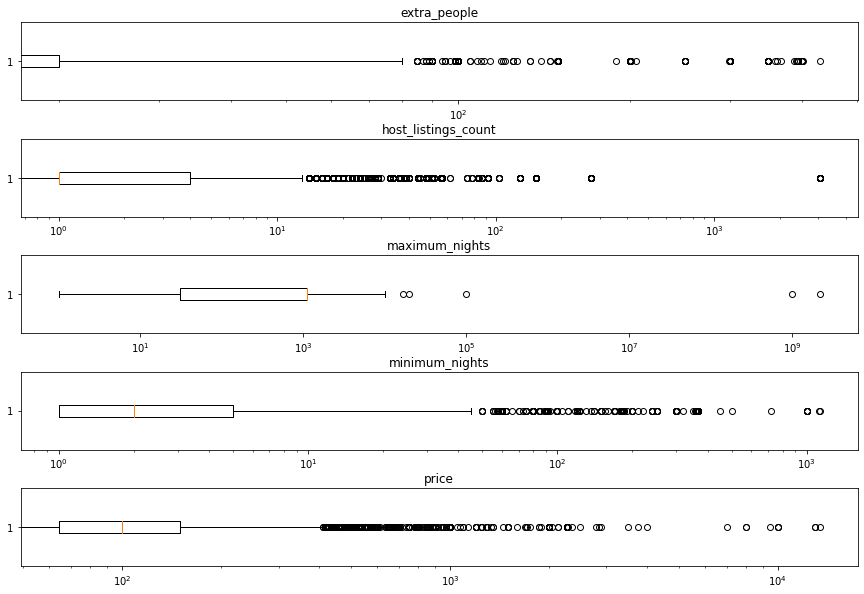

In [19]:
#cols_for_outlier_explore = ['price', 'extra_people', 'cleaning_fee']
cols_for_outlier_explore = ['extra_people', 'host_listings_count', 'maximum_nights', 'minimum_nights', 'price']

outlier_values = []

whisker_values = [3., 3., 10, 10, 3.]
# whisker_values for 'maximum_nights', 'minimum_nights' are selected to be very high because, as will be shown later, these features 
# are not important in predicting the price so we do not want to lose any row because of having an outlier value for these features.
fig, axes = plt.subplots(nrows=len(cols_for_outlier_explore), ncols=1, figsize=(15,2.*len(cols_for_outlier_explore)))
plt.subplots_adjust(hspace=0.5)
i = 0
cols = cols_for_outlier_explore
for col in cols:
    B = axes[i].boxplot(eda.data.loc[eda.data[cols[i]].notnull(),cols[i]], whis=whisker_values[i], vert=False)
    axes[i].set_title(cols_for_outlier_explore[i]); axes[i].set_xscale('log')
    outlier_values.append([item.get_xdata()[1] for item in B['whiskers']][1])
    print('for col {}, values above {} are outliers'.format(cols_for_outlier_explore[i],outlier_values[i]))
    #print('z score of outlier is {}'.format((outlier_values[i] - eda.data[col].mean())/eda.data[col].std(ddof=0)))
    print('mean {}'.format(eda.data[col].mean()))
    print('std {}'.format(eda.data[col].std(ddof=0)))
    i+=1

# Quartiles, interquartile range, wiskers,and fences: https://stats.stackexchange.com/questions/149161/confused-by-location-of-fences-in-box-whisker-plots/149178#149178

In [20]:
keep_row_within_these_ranges = {cols_for_outlier_explore[i]: [0,outlier_values[i]] for i in range(len(cols_for_outlier_explore))} 
eda.exclude_num_outliers_in_cols(keep_row_within_these_ranges)
print(len(eda.data.index))
print('(# rows after excluding outliers)/(# rows in the original data set) = ', len(eda.data.index)/num_rows_in_original_data)


type(tmp_series) <class 'pandas.core.series.Series'>
excluding outliers from col extra_people  currently, col values are between 0.0  and  430.0
percent of data excluded  1.6677690635925502

type(tmp_series) <class 'pandas.core.series.Series'>
excluding outliers from col host_listings_count  currently, col values are between 0.0  and  3038.0
percent of data excluded  11.135783804214306

type(tmp_series) <class 'pandas.core.series.Series'>
excluding outliers from col maximum_nights  currently, col values are between 1.0  and  2147483600.0
percent of data excluded  11.159406595483324

type(tmp_series) <class 'pandas.core.series.Series'>
excluding outliers from col minimum_nights  currently, col values are between 1.0  and  1125.0
percent of data excluded  13.469715581593123

type(tmp_series) <class 'pandas.core.series.Series'>
excluding outliers from col price  currently, col values are between 0.0  and  13419.0
percent of data excluded  16.00207880563167
17779
(# rows after excluding o

### Plot the distribution of the numerical features after the outliers have been excluded

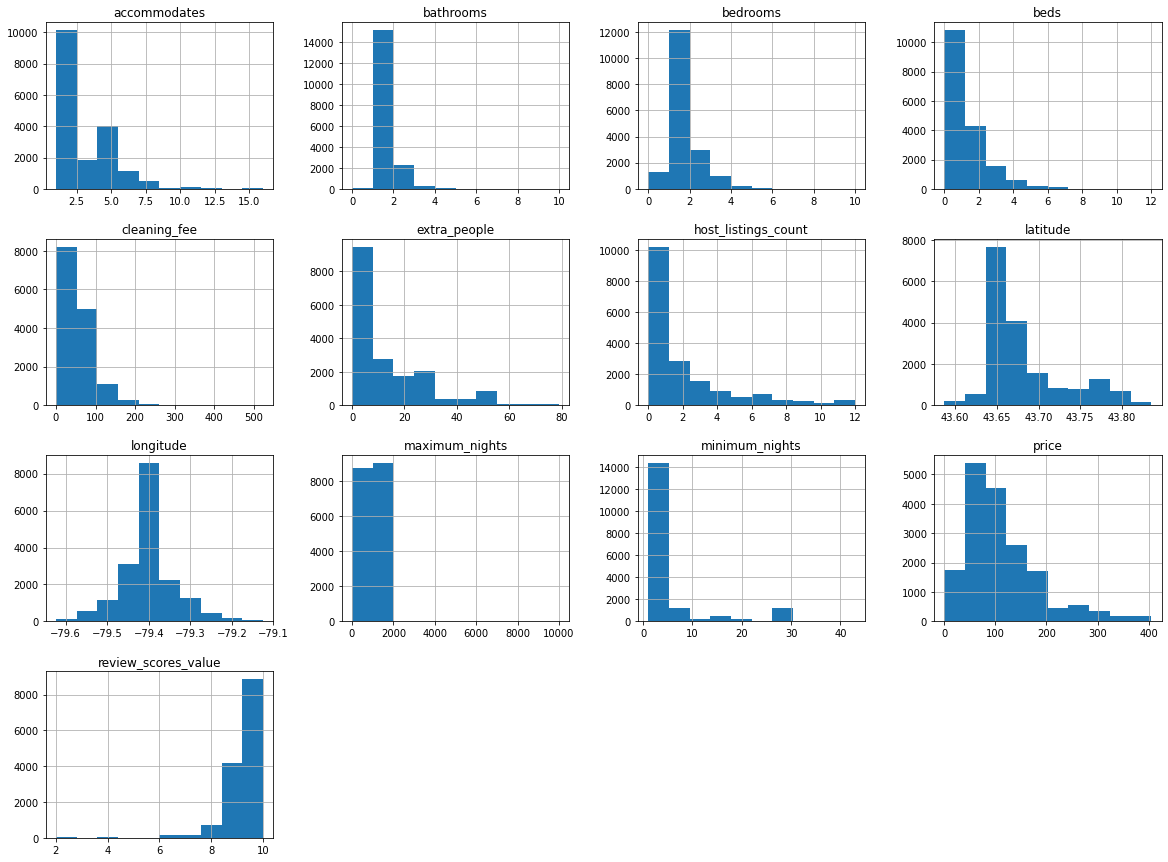

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,15))
eda.data.hist(figsize=(20,15), ax=axes)
address_and_name = os.getcwd() + '/Figures/' + 'DistofNumericalFeaturesOutlierExcluded'
fig.savefig(address_and_name, dpi=200)
plt.show()

### Catagorical features

The 'room_type' catagorical feature contains the following levels: 'Entire home/apt', 'Hotel room', 'Private room', 'Shared room'. It would be reasonable to expect that properties that are entire home/apt will be more expensive than hotel rooms and they will be more expensive than private room and they will be more expensive than shared rooms. In other words, the catagorical feature 'room_type' seems to have a natural order in it. To explore this further, in the following cell we make price distributions for each catagory and the results confirm our expectation. <br/>

It is a good feature engineering practice to encode catagorical features with a natural order using the Ordinal Encoding method, and I will follow that practice.

(10, 10000)

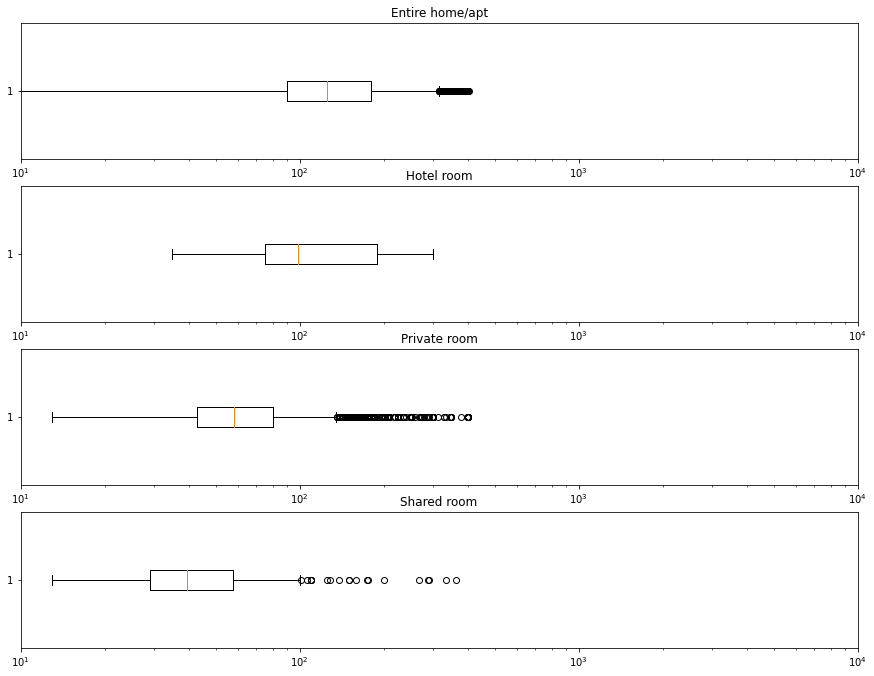

In [22]:
tmp = eda.data.groupby(['room_type'])['price']
whisker_vale = 1.5
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,11.5))
axes[0].boxplot(tmp.get_group('Entire home/apt'), whis=whisker_vale, notch=False, vert=False, showfliers=True)
axes[0].set_title('Entire home/apt'); axes[0].set_xscale('log');axes[0].set_xlim(10,10000)
axes[1].boxplot(tmp.get_group('Hotel room'), whis=whisker_vale, notch=False, vert=False, showfliers=True)
axes[1].set_title('Hotel room'); axes[1].set_xscale('log');axes[1].set_xlim(10,10000)
axes[2].boxplot(tmp.get_group('Private room'), whis=whisker_vale, notch=False, vert=False, showfliers=True)
axes[2].set_title('Private room'); axes[2].set_xscale('log');axes[2].set_xlim(10,10000)
axes[3].boxplot(tmp.get_group('Shared room'), whis=whisker_vale, notch=False, vert=False, showfliers=True)
axes[3].set_title('Shared room'); axes[3].set_xscale('log');axes[3].set_xlim(10,10000)

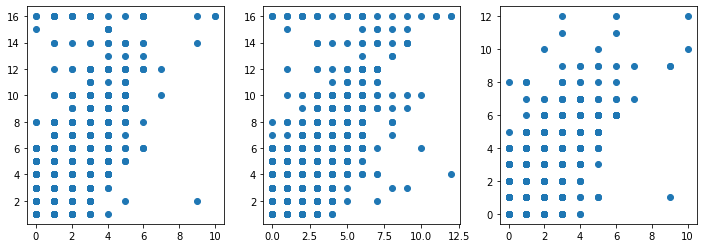

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(12,4))
axes[0].scatter(eda.data['bedrooms'], eda.data['accommodates'])
axes[1].scatter(eda.data['beds'], eda.data['accommodates'])
axes[2].scatter(eda.data['bedrooms'], eda.data['beds'])

In [24]:
from category_encoders import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
print(cols_to_be_encoded)
try:
    print(eda.data['room_type'].unique())
    print(eda.data['cancellation_policy'].unique())
except:
    pass
encoding_method_for_each_cat = {'room_type':'Ordinal', 'host_is_superhost':'get_dummies', 'host_identity_verified':'get_dummies', 'host_has_profile_pic':'get_dummies', 'is_location_exact':'get_dummies', 'cancellation_policy':'Ordinal'}
# mapping is a dictionary of dictionaries
mapping_for_ordinal_cat_1 = {"entire home/apt":3, 'hotel room':2, 'private room':1, 'shared room':0}
mapping_for_ordinal_cat_2 = {"flexible":4, 'moderate':3, 'strict_14_with_grace_period':2, 'super_strict_30':1, 'super_strict_60':0}

mapping = {'room_type':mapping_for_ordinal_cat_1, 'cancellation_policy':mapping_for_ordinal_cat_2}
eda.preprocess_cat_and_num_cols(cols_to_be_encoded, encoding_method_for_each_cat, cols_to_be_scaled, 'Normalization')

['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic', 'host_verifications', 'is_location_exact', 'room_type', 'cancellation_policy']
['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']
['moderate' 'strict_14_with_grace_period' 'flexible' 'super_strict_30'
 'super_strict_60']
col= host_is_superhost
col= host_identity_verified
col= host_has_profile_pic
col= host_verifications
failed in standarizing colhost_verifications
col= is_location_exact
col= room_type
col= cancellation_policy
failed in encode then delete col  host_verifications


In [25]:
eda.data.iloc[:,0:eda.data.shape[1]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17779 entries, 2 to 21162
Data columns (total 23 columns):
price                       17779 non-null float64
bedrooms                    17779 non-null float64
bathrooms                   17779 non-null float64
host_listings_count         17779 non-null float64
minimum_nights              17779 non-null float64
maximum_nights              17779 non-null float64
latitude                    17779 non-null float64
longitude                   17779 non-null float64
accommodates                17779 non-null float64
beds                        17779 non-null float64
cleaning_fee                17779 non-null float64
extra_people                17779 non-null float64
review_scores_value         17779 non-null float64
host_is_superhost_f         17779 non-null uint8
host_is_superhost_t         17779 non-null uint8
host_identity_verified_f    17779 non-null uint8
host_identity_verified_t    17779 non-null uint8
host_has_profile_pic_f      1777

### Inspect the distribution of the encoded catagorical features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F1BE025240>,
      dtype=object)

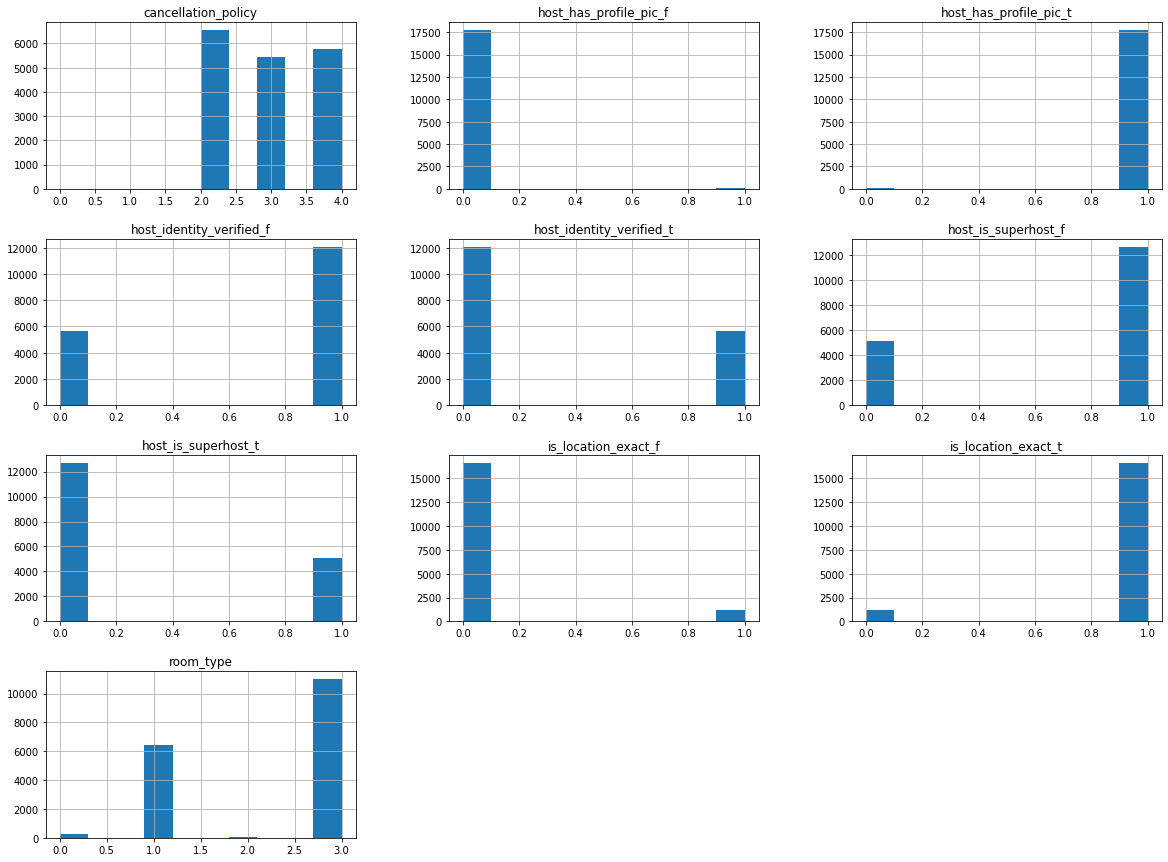

In [26]:
tmp_cat = eda.data.select_dtypes(include='uint8')
tmp_cat.hist(figsize=(20,15))

Let's check to make sure that we have not lost any significant portion of data by excluding outliers...

In [27]:
print(len(eda.data.index)/num_rows_in_original_data)

0.8399792119436833


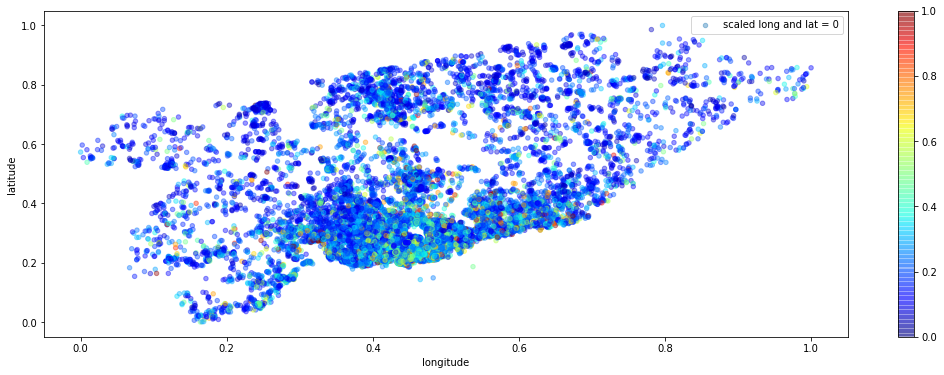

In [28]:
num_price_cats = 1
nrows_ = 1
ncols_=1
fig, axes = plt.subplots(nrows=nrows_, ncols=ncols_)
for i in range(num_price_cats):
    if i < ncols_:
        i_r = 0; i_c = i
    else:
        i_r = 1; i_c = i - ncols_

    eda.data.plot(ax=axes, kind="scatter", x="longitude", y="latitude", alpha=0.4, c=eda.data['price'], cmap=plt.get_cmap("jet"), figsize=(18,6), colorbar=True, sharex=False, label="scaled long and lat = " + str(i))

### Checking for correlations
#### Through standard correlation coefficient (also called Pearson’s) and through Pandas scatter_matrix

In [29]:
corr_matrix = eda.data.corr()
corr_before_drop_confounders_and_intercorrelated = corr_matrix['price'].sort_values(ascending=False)
print(corr_before_drop_confounders_and_intercorrelated[abs(corr_before_drop_confounders_and_intercorrelated) > 0.01])

price                       1.000000
accommodates                0.553135
room_type                   0.502298
cleaning_fee                0.479401
bedrooms                    0.468746
beds                        0.456094
bathrooms                   0.325996
extra_people                0.126048
maximum_nights              0.047708
host_identity_verified_t    0.045725
review_scores_value         0.035583
host_is_superhost_t         0.029213
longitude                   0.017792
minimum_nights              0.014030
is_location_exact_f         0.012465
is_location_exact_t        -0.012465
host_is_superhost_f        -0.029213
host_identity_verified_f   -0.045725
host_listings_count        -0.062083
cancellation_policy        -0.126046
latitude                   -0.276608
Name: price, dtype: float64


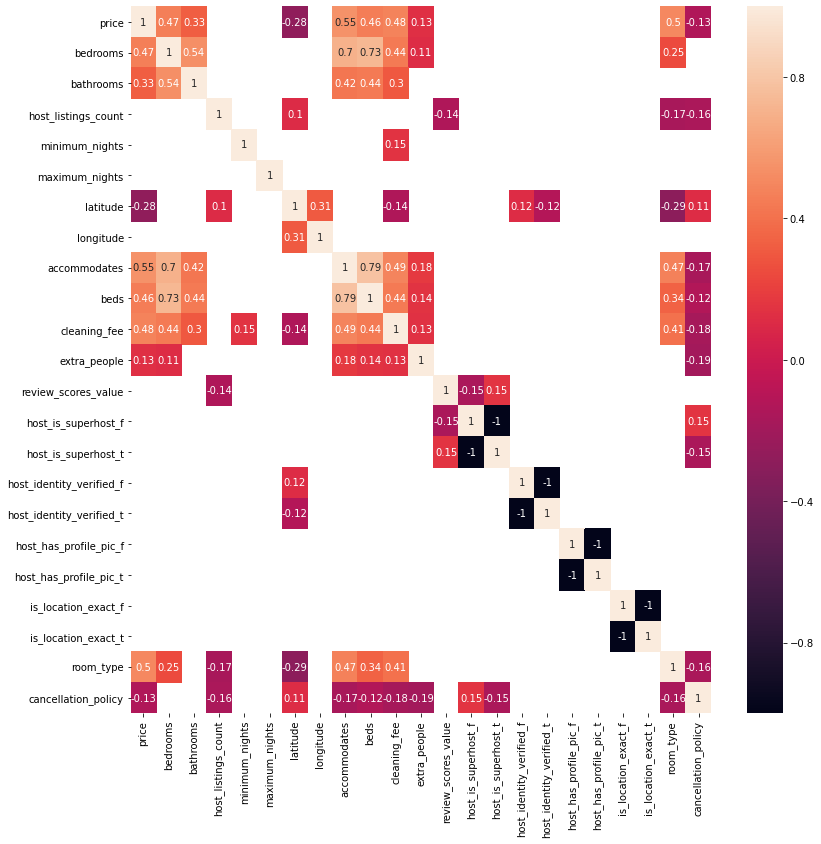

In [30]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(13,13)) 
tmp = eda.data.corr()
tmp = tmp[abs(tmp) > 0.1]
sns.heatmap(tmp, annot=True, ax=ax, vmin=-1, vmax=1)
address_and_name = os.getcwd() + '/Figures/' + 'CorrelationHeatmap'
fig.savefig(address_and_name, dpi=200)
# The plot here is much more clean: https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/

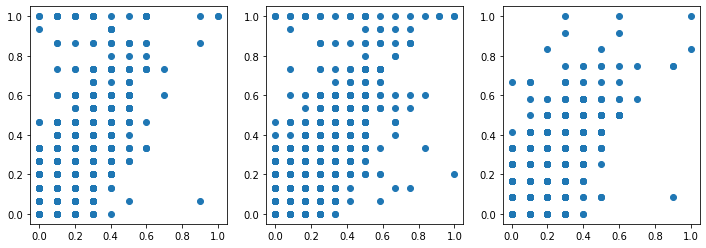

## Drop the features with high intercorellations

In [31]:
cols = ['host_is_superhost_t', 'host_identity_verified_t', 'host_has_profile_pic_t', 'is_location_exact_t']
eda.drop_these_cols(cols)

## Engineer a new feature: distance

In [32]:
from geopy.distance import great_circle
def distance_to_mid(lat, lon):
    #berlin_centre = (52.5027778, 13.404166666666667)
    Toronto_center = (43.653225, -79.383186)
    accommodation = (lat, lon)
    return great_circle(Toronto_center, accommodation).km
try:
    eda.data['distance'] = eda.data.apply(lambda x: distance_to_mid(x.latitude, x.longitude), axis=1)
except:
    print('failed in creating distance feature')

In [33]:
eda.preprocess_cat_and_num_cols([], {}, ['distance'], 'Normalization')

In [34]:
cols = ['latitude', 'longitude']
eda.drop_these_cols(cols)
eda.data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17779 entries, 2 to 21162
Data columns (total 18 columns):
price                       17779 non-null float64
bedrooms                    17779 non-null float64
bathrooms                   17779 non-null float64
host_listings_count         17779 non-null float64
minimum_nights              17779 non-null float64
maximum_nights              17779 non-null float64
accommodates                17779 non-null float64
beds                        17779 non-null float64
cleaning_fee                17779 non-null float64
extra_people                17779 non-null float64
review_scores_value         17779 non-null float64
host_is_superhost_f         17779 non-null uint8
host_identity_verified_f    17779 non-null uint8
host_has_profile_pic_f      17779 non-null uint8
is_location_exact_f         17779 non-null uint8
room_type                   17779 non-null uint8
cancellation_policy         17779 non-null uint8
distance                    17779 no

## Use common sense and domain knowledge to identify confounders

Note from the above correlation map that feature 'accomodates' correlates relatively strongly (>0.5) with features 'beds' and 'bedrooms' both. It counfounds them. Therefore, the latter two columns are dropped in favor of the counfounder.  

In [35]:
cols = ['beds', 'bedrooms']
eda.drop_these_cols(cols)

In [36]:
from pandas.plotting import scatter_matrix
attributes  = ['price', 'accommodates', 'cleaning_fee']
#pd.plotting.scatter_matrix(eda.data[attributes], alpha=0.2, figsize=(12, 8))

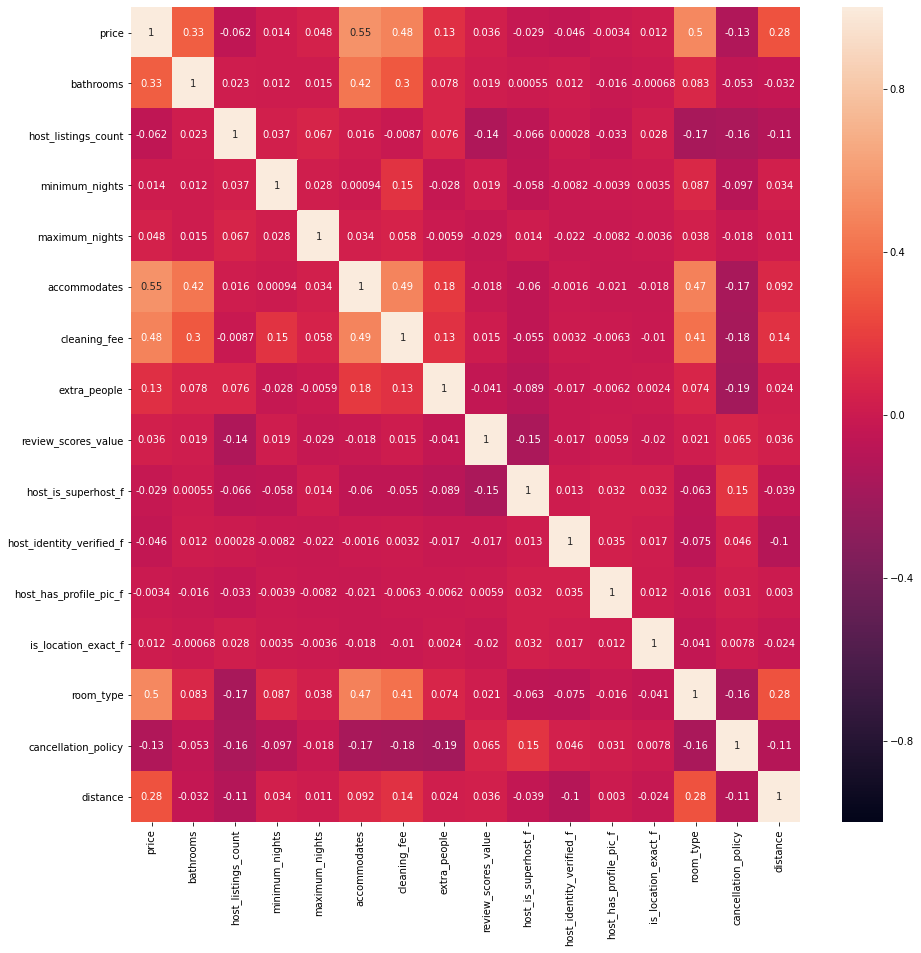

In [37]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(eda.data.corr(), annot=True, ax=ax, vmin=-1, vmax=1)
address_and_name = os.getcwd() + '/Figures/' + 'CorrelationHeatmapFinal.png'
fig.savefig(address_and_name, dpi=200)

Comparing the average price of entire/shared rooms with the price of entire apartments

In [38]:
# mapping_for_ordinal_cat_1 = {"entire home/apt":3, 'hotel room':2, 'private room':1, 'shared room':0}
eda.data.groupby('room_type')['price'].mean()

room_type
0    0.128430
1    0.168819
2    0.300905
3    0.353903
Name: price, dtype: float64

## End of exploratory data analysis

## Fit different models and evaluate them
### Liner regression <br/>

### Prepare a holdout set

In [39]:
X_train, X_holdout, y_train, y_holdout = train_test_split(eda.data.drop(["price"], axis=1), eda.data['price'], test_size=0.2, random_state=1)
eda.data = pd.concat([X_train, y_train],axis=1)
eda.holdout = pd.concat([X_holdout, y_holdout],axis=1)

### Fit linear regression and make predictions

In [40]:
model_name = linear_model.LinearRegression()
#model = linear_model.Ridge(alpha=.5)
model = BuildModelAfterSelectingFeatures(eda.data, model_name, test_size=0.2, num_features_to_select=10)
model.fit_and_predict()

selected features: ['bathrooms', 'minimum_nights', 'maximum_nights', 'accommodates', 'cleaning_fee', 'review_scores_value', 'host_has_profile_pic_f', 'is_location_exact_f', 'room_type', 'distance']


In [43]:
%%capture cap 
import numpy as np
EvalModelObj = EvaluateTheModel(model_name, model.X_train, model.X_test, model.y_train, model.y_test, model.y_train_pred, model.y_test_pred)
y_holdout_pred = model_name.predict(X_holdout[model.selected_features_names])
print(f"RMSE_holdout: {round(np.sqrt(mean_squared_error(y_holdout, y_holdout_pred)), 4)}")
print(f"r2_holdout: {round(r2_score(y_holdout, y_holdout_pred), 4)}")
address_and_name = os.getcwd() + '/Performances/' + 'LRPerformances.txt'
with open(address_and_name, 'w') as f:
    f.seek(0)
    f.write(cap.stdout)
    f.truncate()
    f.close()

In [44]:
with open(address_and_name, 'r') as f:
    print(f.read())

RMSE_train: 0.1333
r2_train: 0.4572
RMSE_test: 0.1287
r2_test: 0.4705
RMSE_holdout: 0.1342
r2_holdout: 0.4476



{'bathrooms': 0.5460217353882009, 'cleaning_fee': 0.45655084166729126, 'accommodates': 0.4022565659374462, 'distance': 0.15531533926969007, 'maximum_nights': 0.05893913793261801, 'review_scores_value': 0.05072197124576291, 'room_type': 0.04374173831169578, 'is_location_exact_f': 0.025282380529247837, 'host_has_profile_pic_f': 0.021755131976701245, 'minimum_nights': -0.04658225025026991}


<BarContainer object of 10 artists>

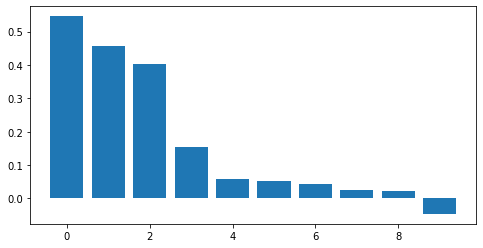

In [45]:
coef_dict = {}
model_1_features = model.X_train.columns
for coef, feat in zip(model_name.coef_[0], model_1_features):
    coef_dict[feat] = coef
coef_dict = dict(sorted(coef_dict.items(), key=lambda item: item[1], reverse=True))
print(coef_dict)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))  
axes.bar([x for x in range(len(list(coef_dict.values())))], coef_dict.values())

### Plotting the predicted vs. actual prices

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


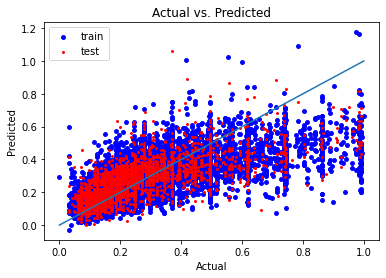

In [46]:
EvalModelObj.plot_actual_vs_predicted()

### Plot the distribution of the residuals

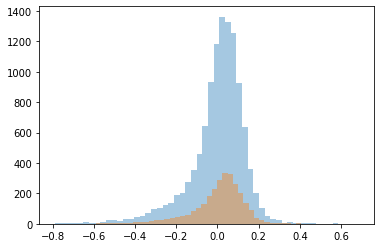

In [47]:
EvalModelObj.plot_residual_distribution()

### Checking for homoskedasticity:

MTR inside resdiuals.py fit functions


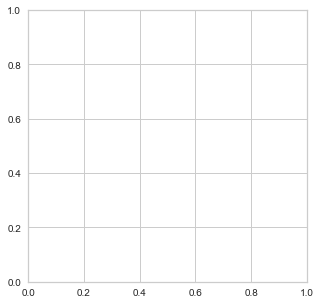

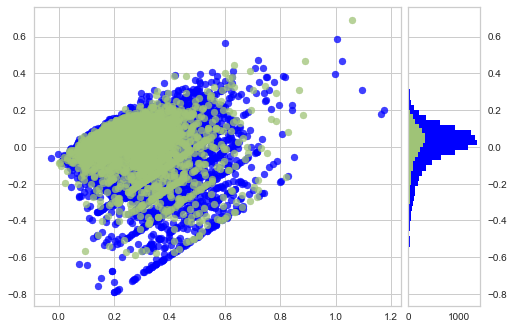

In [49]:
EvalModelObj.check_homoskedasticity()

### Checking for error normality with q-q plots:

now checking for the normality of the errors (are the errors normaly distributed?
making the quantile-quantile plot...
self.y_train_pred.shape, self.y_train.shape (11378, 1) (11378, 1)


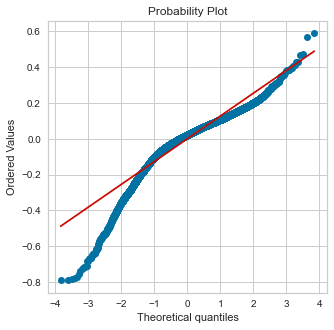

In [43]:
EvalModelObj.check_error_normality_q_q_plot()

### Checking for error normality with Anderson-Darling

In [44]:
EvalModelObj.check_error_normality_AD_test()

Performig Anderson-Darling test
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed
Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


### Checking for auto-correlations by performing Durbin-Watson test

In [45]:
EvalModelObj.check_auto_correlation()

Now checking No Autocorrelation assumption 

by perfroming the Durbin-Watson test
Durbin-Watson: [1.96759074]
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Little to no autocorrelation 

Assumption satisfied


### Effect of the number of features on the performance of linear regression

In [46]:
model_name = linear_model.LinearRegression()
scores = []
hold_out_scores = []
num_features_in_dataset = 16
for num_features in range(2, num_features_in_dataset):
    model = BuildModelAfterSelectingFeatures(eda.data, model_name, test_size=0.2, num_features_to_select=num_features)
    model.fit_and_predict()
    EvalModelObj = EvaluateTheModel(model_name, model.X_train, model.X_test, model.y_train, model.y_test, model.y_train_pred, model.y_test_pred, print_scores=False)
    scores.append([num_features, EvalModelObj.get_scores()])
    
    y_holdout_pred = model_name.predict(X_holdout[model.selected_features_names])
    RMSE_holdout = round(np.sqrt(mean_squared_error(y_holdout, y_holdout_pred)), 4)
    r2_holdout = round(r2_score(y_holdout, y_holdout_pred), 4)
    hold_out_scores.append([RMSE_holdout,r2_holdout])

selected features: ['accommodates', 'cleaning_fee']
selected features: ['bathrooms', 'accommodates', 'cleaning_fee']
selected features: ['bathrooms', 'accommodates', 'cleaning_fee', 'distance']
selected features: ['bathrooms', 'maximum_nights', 'accommodates', 'cleaning_fee', 'distance']
selected features: ['bathrooms', 'maximum_nights', 'accommodates', 'cleaning_fee', 'review_scores_value', 'distance']
selected features: ['bathrooms', 'minimum_nights', 'maximum_nights', 'accommodates', 'cleaning_fee', 'review_scores_value', 'distance']
selected features: ['bathrooms', 'minimum_nights', 'maximum_nights', 'accommodates', 'cleaning_fee', 'review_scores_value', 'room_type', 'distance']
selected features: ['bathrooms', 'minimum_nights', 'maximum_nights', 'accommodates', 'cleaning_fee', 'review_scores_value', 'is_location_exact_f', 'room_type', 'distance']
selected features: ['bathrooms', 'minimum_nights', 'maximum_nights', 'accommodates', 'cleaning_fee', 'review_scores_value', 'host_has_pr

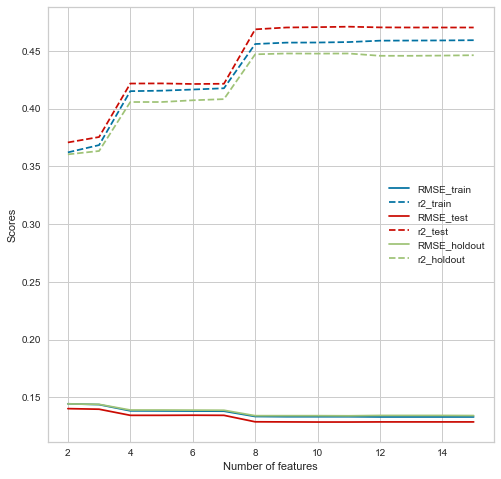

In [47]:
x, RMSE_train, r2_train, RMSE_test, r2_test, RMSE_holdout, r2_holdout = [], [],[],[],[],[],[]
for i in range(len(scores)):
    x.append(scores[i][0])
    RMSE_train.append(scores[i][1][0])
    r2_train.append(scores[i][1][1])
    RMSE_test.append(scores[i][1][2])
    r2_test.append(scores[i][1][3])
    RMSE_holdout.append(hold_out_scores[i][0])
    r2_holdout.append(hold_out_scores[i][1])
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
axes.plot(x,RMSE_train, label = 'RMSE_train', color='b', ls='-')
axes.plot(x,r2_train, label = 'r2_train', color='b', ls='--')
axes.plot(x,RMSE_test, label = 'RMSE_test', color='r', ls='-')
axes.plot(x,r2_test, label = 'r2_test', color='r', ls='--')
axes.plot(x,RMSE_holdout, label = 'RMSE_holdout', color='g', ls='-')
axes.plot(x,r2_holdout, label = 'r2_holdout', color='g', ls='--')
plt.legend()
plt.xlabel('Number of features')
plt.ylabel('Scores')
#plt.title('Effect of the number of features on the performance of linear regression ')
address_and_name = os.getcwd() + '/Figures/' + 'NumFeaturesLR.png'
fig.savefig(address_and_name)
plt.show()

### Why linear regression is not appropriate for this dataset?<br/>

From the above plots, it can be seen that two of the liner regression assumptions are not satisfied: homoskedasticity and error-normality

#### Heteroskedastic errors:

The third plot shows that the residuals are not distributed uniformly accross different price values. They, in general, increase with price. <br/>
The problem that heteroscedasticity presents for regression models is simple.  Recall that ordinary least-squares (OLS) regression seeks to minimize residuals and in turn produce the smallest possible standard errors.  By definition, OLS regression gives equal weight to all observations, but when heteroscedasticity is present, the cases with larger disturbances have more “pull” than other observations.  In this case, weighted least squares regression would be more appropriate, as it down-weights those observations with larger disturbances.

#### Error-non-normality:

The last plot and also the Anderson-Darling test show that errors are not normally distrbuted. This problem was alleviated, to some extent, when we limited the price range in the training set. However, that required excluding more than 30% of the observations.

#### Solutions that can potentially help alleviating the above violations in the underlying assumptions

There are at least two solutions that may alleviate the above problems:

1) The heteroscedasticity problem may also be alleviated by using weighted least squares, instead of OLS. <br/>
2) It may also be helpful to divide the data set into different catagories based on price and fit separate LR to each catagory.

Because there are alternatives to LR, in the rest of the project, we will continue by exploring those alternatives. Investigating the above possible solutions are left for future exploration.

## Alternatives to linear regression: tree-based regression models
### Decision tree

In [63]:
%%time
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
num_features_in_dataset = 16
FitPredictObj = BuildModelAfterSelectingFeatures(eda.data, model, test_size=0.2, num_features_to_select=num_features_in_dataset)
param_grid = {'max_depth' : [6, 7, 8], 'min_samples_split' : [6, 10]}
tunned_hypparam = FitPredictObj.tune_and_reset_hyperparameters(param_grid)
#Rebuild the model with tunned hypter parameters
model = DecisionTreeRegressor(max_depth=tunned_hypparam['max_depth'], min_samples_split=tunned_hypparam['min_samples_split'])
FitPredictObj = BuildModelAfterSelectingFeatures(eda.data, model, test_size=0.2, num_features_to_select=num_features_in_dataset)
FitPredictObj.fit_and_predict()

selected features: ['bathrooms', 'host_listings_count', 'minimum_nights', 'maximum_nights', 'accommodates', 'cleaning_fee', 'extra_people', 'review_scores_value', 'host_is_superhost_f', 'host_identity_verified_f', 'host_has_profile_pic_f', 'is_location_exact_f', 'room_type', 'cancellation_policy', 'distance']
model_grid_search= {'max_depth': 7, 'min_samples_split': 10}
selected features: ['bathrooms', 'host_listings_count', 'minimum_nights', 'maximum_nights', 'accommodates', 'cleaning_fee', 'extra_people', 'review_scores_value', 'host_is_superhost_f', 'host_identity_verified_f', 'host_has_profile_pic_f', 'is_location_exact_f', 'room_type', 'cancellation_policy', 'distance']
Wall time: 2.77 s


Feature importance

{'room_type': 0.48327641600640625, 'bathrooms': 0.2156332833688918, 'accommodates': 0.09003955043631669, 'distance': 0.08536921800386355, 'cleaning_fee': 0.07149804577947538, 'extra_people': 0.02394502500340751, 'host_listings_count': 0.013247087273675654, 'maximum_nights': 0.006485075654362975, 'minimum_nights': 0.0035370324871058594, 'cancellation_policy': 0.003461830835084042, 'review_scores_value': 0.002362996847705129, 'is_location_exact_f': 0.0005165281643449371, 'host_has_profile_pic_f': 0.0004960790046358311, 'host_identity_verified_f': 0.0001318311347243719, 'host_is_superhost_f': 0.0}


<BarContainer object of 15 artists>

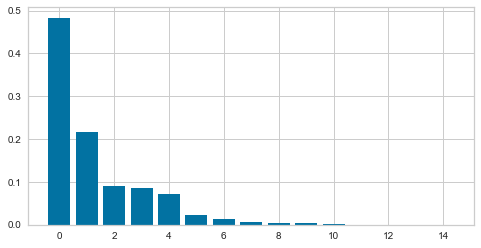

In [67]:
model_2 = DecisionTreeRegressor(max_depth=tunned_hypparam['max_depth'], min_samples_split=tunned_hypparam['min_samples_split'])
model_2.fit(FitPredictObj.X_train, FitPredictObj.y_train)
model_2_features = X_train.columns
for coef, feat in zip(model_2.feature_importances_, model_2_features):
    coef_dict[feat] = coef
coef_dict = dict(sorted(coef_dict.items(), key=lambda item: item[1], reverse=True))
print(coef_dict)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))  
axes.bar([x for x in range(len(list(coef_dict.values())))], coef_dict.values())

In [65]:
# udfs ----

# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

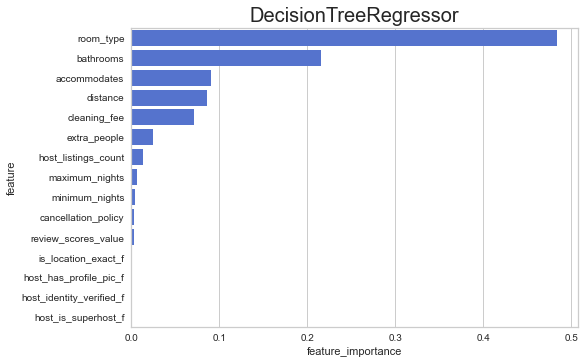

In [68]:
base_imp = imp_df(model_2_features, model_2.feature_importances_)
var_imp_plot(base_imp, str(type(model).__name__))

In [50]:
%%capture cap 
EvaluateTheModelObj = EvaluateTheModel(model, FitPredictObj.X_train, FitPredictObj.X_test, FitPredictObj.y_train, FitPredictObj.y_test, FitPredictObj.y_train_pred, FitPredictObj.y_test_pred)
address_and_name_2 = os.getcwd() + '/Performances/' + 'DTPerformances.txt'
with open(address_and_name_2, 'w') as f:
    f.seek(0)
    f.write(cap.stdout)
    f.truncate()
    f.close()

In [51]:
with open(address_and_name_2, 'r') as f:
    print(f.read())

RMSE_train: 0.1333
r2_train: 0.4572
RMSE_test: 0.1287
r2_test: 0.4705
RMSE_holdout: 0.1342
r2_holdout: 0.4476



### Visualizing the tree

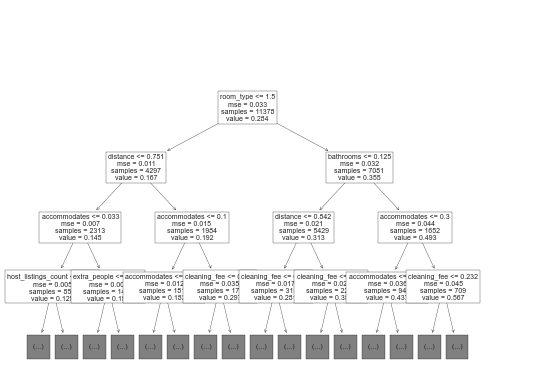

In [52]:
from sklearn import tree
#fig, ax = plt.subplots(figsize=(20,7)) 
fig, ax = plt.subplots() 
tree.plot_tree(model,max_depth=3, ax=ax, feature_names=FitPredictObj.selected_features_names, fontsize=7)
plt.tight_layout()
address_and_name = os.getcwd() + '/Figures/' + 'VisualizeTree.png'
fig.savefig(address_and_name)

### Effect of the number of features on the performance of decision tree

In [57]:
%%time
num_features_in_dataset = 16
model = DecisionTreeRegressor()
scores=[]
for num_features in range(2,num_features_in_dataset):
    FitPredictObj = BuildModelAfterSelectingFeatures(eda.data, model, test_size=0.2, num_features_to_select=num_features)
    #param_grid = {'max_depth' : [2, 7, 10], 'min_samples_split' : [250, 300, 350]}
    param_grid = {'max_depth' : [2, 7, 10]}
    tunned_hypparam = FitPredictObj.tune_and_reset_hyperparameters(param_grid)
    #Rebuild the model with tunned hypter parameters
    model = DecisionTreeRegressor(max_depth=tunned_hypparam['max_depth'])
    FitPredictObj = BuildModelAfterSelectingFeatures(eda.data, model, test_size=0.2, num_features_to_select=num_features)
    FitPredictObj.fit_and_predict()
    EvalModelObj = EvaluateTheModel(model, FitPredictObj.X_train, FitPredictObj.X_test, FitPredictObj.y_train, FitPredictObj.y_test, FitPredictObj.y_train_pred, FitPredictObj.y_test_pred, print_scores=False)
    scores.append([num_features, EvalModelObj.get_scores()])

selected features: ['room_type', 'distance']
model_grid_search= {'max_depth': 2}
selected features: ['bathrooms', 'room_type']
first try to calc self.model_residuals_train failed. Trying another method
selected features: ['bathrooms', 'room_type', 'distance']
model_grid_search= {'max_depth': 7}
selected features: ['bathrooms', 'room_type', 'distance']
first try to calc self.model_residuals_train failed. Trying another method
selected features: ['bathrooms', 'accommodates', 'room_type', 'distance']
model_grid_search= {'max_depth': 7}
selected features: ['bathrooms', 'accommodates', 'room_type', 'distance']
first try to calc self.model_residuals_train failed. Trying another method
selected features: ['bathrooms', 'accommodates', 'cleaning_fee', 'room_type', 'distance']
model_grid_search= {'max_depth': 7}
selected features: ['bathrooms', 'accommodates', 'cleaning_fee', 'room_type', 'distance']
first try to calc self.model_residuals_train failed. Trying another method
selected features: ['

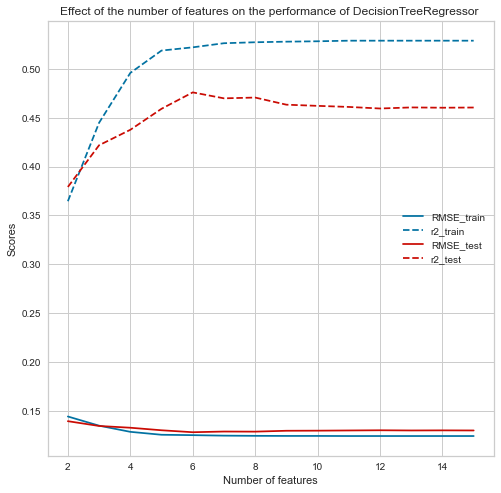

In [58]:
x, RMSE_train, r2_train, RMSE_test, r2_test = [], [],[],[],[]
for i in range(len(scores)):
    x.append(scores[i][0])
    RMSE_train.append(scores[i][1][0])
    r2_train.append(scores[i][1][1])
    RMSE_test.append(scores[i][1][2])
    r2_test.append(scores[i][1][3])
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
axes.plot(x,RMSE_train, label = 'RMSE_train', color='b', ls='-')
axes.plot(x,r2_train, label = 'r2_train', color='b', ls='--')
axes.plot(x,RMSE_test, label = 'RMSE_test', color='r', ls='-')
axes.plot(x,r2_test, label = 'r2_test', color='r', ls='--')
plt.legend()
plt.xlabel('Number of features')
plt.ylabel('Scores')
plt.title('Effect of the number of features on the performance of DecisionTreeRegressor ')
plt.show()
address_and_name = os.getcwd() + '/Figures/' + 'NumFeaturesDT.png'
fig.savefig(address_and_name)

## Ensemble methods: Random forest

It consists of different decision tress trained on sampled features and sampled subsets of the dataset. In a RF, only a random subset of features is considered for splitting a node. 


In [69]:
%%time
num_features_in_dataset = 16
from sklearn.ensemble import RandomForestRegressor
model_3 = RandomForestRegressor(bootstrap=True)
FitPredictObj = BuildModelAfterSelectingFeatures(eda.data, model_3, test_size=0.2, num_features_to_select=num_features_in_dataset)
#param_grid = {'n_estimators':[100, 200], 'max_depth' : [6, 7, 8], 'min_samples_split' : [6, 10]} # r2_test: 0.5085
param_grid = {'n_estimators':[100, 200], 'min_samples_split' : [6, 10]} # r2_test: 0.5085
tunned_hypparam = FitPredictObj.tune_and_reset_hyperparameters(param_grid)
model_3 = RandomForestRegressor(n_estimators=tunned_hypparam['n_estimators'], min_samples_split=tunned_hypparam['min_samples_split'], random_state=0, bootstrap=True)
FitPredictObj = BuildModelAfterSelectingFeatures(eda.data, model_3, test_size=0.2, num_features_to_select=num_features_in_dataset)
FitPredictObj.fit_and_predict()

selected features: ['bathrooms', 'host_listings_count', 'minimum_nights', 'maximum_nights', 'accommodates', 'cleaning_fee', 'extra_people', 'review_scores_value', 'host_is_superhost_f', 'host_identity_verified_f', 'host_has_profile_pic_f', 'is_location_exact_f', 'room_type', 'cancellation_policy', 'distance']
model_grid_search= {'min_samples_split': 10, 'n_estimators': 200}
selected features: ['bathrooms', 'host_listings_count', 'minimum_nights', 'maximum_nights', 'accommodates', 'cleaning_fee', 'extra_people', 'review_scores_value', 'host_is_superhost_f', 'host_identity_verified_f', 'host_has_profile_pic_f', 'is_location_exact_f', 'room_type', 'cancellation_policy', 'distance']
Wall time: 1min 15s


In [73]:
%%capture cap 
EvaluateTheModelObj = EvaluateTheModel(model_3, FitPredictObj.X_train, FitPredictObj.X_test, FitPredictObj.y_train, FitPredictObj.y_test, FitPredictObj.y_train_pred, FitPredictObj.y_test_pred)
address_and_name_3 = os.getcwd() + '/Performances/' + 'RFPerformances.txt'
with open(address_and_name_3, 'w') as f:
    f.seek(0)
    f.write(cap.stdout)
    f.truncate()
    f.close()

In [74]:
with open(address_and_name_3, 'r') as f:
    print(f.read())

first try to calc self.model_residuals_train failed. Trying another method
RMSE_train: 0.0779
r2_train: 0.8145
RMSE_test: 0.1227
r2_test: 0.5191



[Text(558.0, 216.2045454545454, 'room_type <= 1.5\nmse = 0.033\nsamples = 7186\nvalue = 0.284'),
 Text(279.0, 154.43181818181813, 'distance <= 0.751\nmse = 0.011\nsamples = 2714\nvalue = 0.168'),
 Text(139.5, 92.65909090909088, 'accommodates <= 0.033\nmse = 0.007\nsamples = 1480\nvalue = 0.147'),
 Text(69.75, 30.886363636363626, '\n  (...)  \n'),
 Text(209.25, 30.886363636363626, '\n  (...)  \n'),
 Text(418.5, 92.65909090909088, 'accommodates <= 0.1\nmse = 0.015\nsamples = 1234\nvalue = 0.193'),
 Text(348.75, 30.886363636363626, '\n  (...)  \n'),
 Text(488.25, 30.886363636363626, '\n  (...)  \n'),
 Text(837.0, 154.43181818181813, 'bathrooms <= 0.125\nmse = 0.032\nsamples = 4472\nvalue = 0.355'),
 Text(697.5, 92.65909090909088, 'distance <= 0.85\nmse = 0.022\nsamples = 3447\nvalue = 0.315'),
 Text(627.75, 30.886363636363626, '\n  (...)  \n'),
 Text(767.25, 30.886363636363626, '\n  (...)  \n'),
 Text(976.5, 92.65909090909088, 'accommodates <= 0.3\nmse = 0.043\nsamples = 1025\nvalue = 0.4

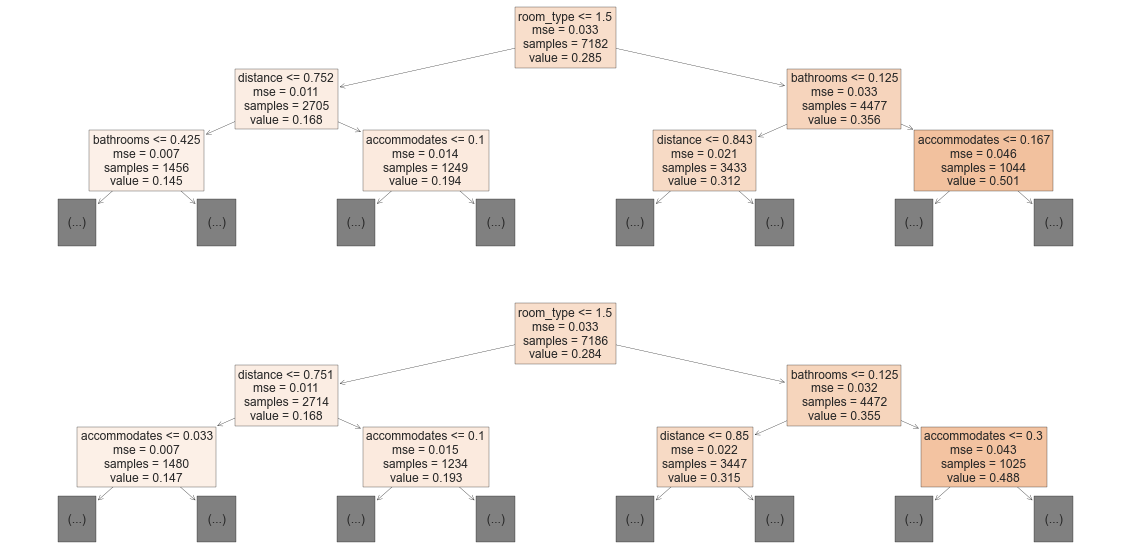

In [76]:
from sklearn import tree
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(20,10)) 
tree.plot_tree(model_3[0], max_depth=2, ax=ax[0], feature_names=FitPredictObj.selected_features_names, filled=True)
tree.plot_tree(model_3[9], max_depth=2, ax=ax[1], feature_names=FitPredictObj.selected_features_names, filled=True)

Feature Importance

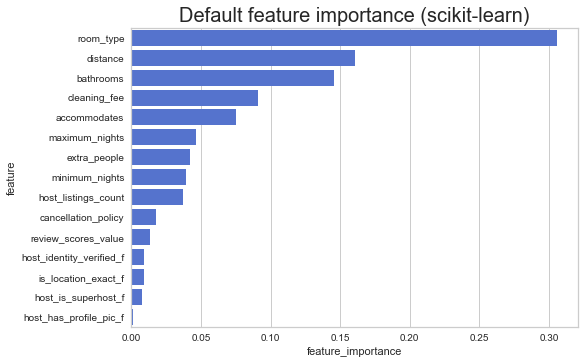

In [77]:
base_imp = imp_df(model_3_features, model_3.feature_importances_)
var_imp_plot(base_imp, 'Default feature importance (scikit-learn)')

### Effect of the number of estimators on the performance of random forest

In [65]:
%%time
num_features_in_dataset = 16
model = RandomForestRegressor()
scores=[]
for num_estimators in range(2, 50):
    print('num_estimators=', num_estimators)
    model = RandomForestRegressor(n_estimators=num_estimators, random_state=0)
    FitPredictObj = BuildModelAfterSelectingFeatures(eda.data, model, test_size=0.2, num_features_to_select=num_features_in_dataset)
    FitPredictObj.fit_and_predict()
    EvalModelObj = EvaluateTheModel(model, FitPredictObj.X_train, FitPredictObj.X_test, FitPredictObj.y_train, FitPredictObj.y_test, FitPredictObj.y_train_pred, FitPredictObj.y_test_pred, print_scores=False)
    scores.append([num_estimators, EvalModelObj.get_scores()])

num_estimators= 2
selected features: ['bathrooms', 'host_listings_count', 'minimum_nights', 'maximum_nights', 'accommodates', 'cleaning_fee', 'extra_people', 'review_scores_value', 'host_is_superhost_f', 'host_identity_verified_f', 'host_has_profile_pic_f', 'is_location_exact_f', 'room_type', 'cancellation_policy', 'distance']
first try to calc self.model_residuals_train failed. Trying another method
num_estimators= 3
selected features: ['bathrooms', 'host_listings_count', 'minimum_nights', 'maximum_nights', 'accommodates', 'cleaning_fee', 'extra_people', 'review_scores_value', 'host_is_superhost_f', 'host_identity_verified_f', 'host_has_profile_pic_f', 'is_location_exact_f', 'room_type', 'cancellation_policy', 'distance']
first try to calc self.model_residuals_train failed. Trying another method
num_estimators= 4
selected features: ['bathrooms', 'host_listings_count', 'minimum_nights', 'maximum_nights', 'accommodates', 'cleaning_fee', 'extra_people', 'review_scores_value', 'host_is_su

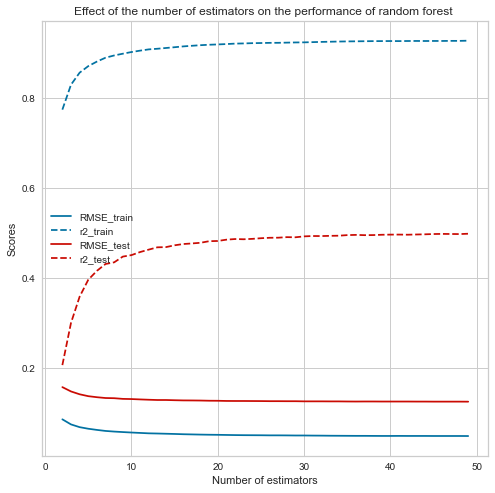

In [67]:
x, RMSE_train, r2_train, RMSE_test, r2_test = [], [],[],[],[]
for i in range(len(scores)):
    x.append(scores[i][0])
    RMSE_train.append(scores[i][1][0])
    r2_train.append(scores[i][1][1])
    RMSE_test.append(scores[i][1][2])
    r2_test.append(scores[i][1][3])
##
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
axes.plot(x,RMSE_train, label = 'RMSE_train', color='b', ls='-')
axes.plot(x,r2_train, label = 'r2_train', color='b', ls='--')
axes.plot(x,RMSE_test, label = 'RMSE_test', color='r', ls='-')
axes.plot(x,r2_test, label = 'r2_test', color='r', ls='--')
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Effect of the number of estimators on the performance of random forest ')
plt.show()
address_and_name = os.getcwd() + '/Figures/' + 'NumEstimatorsRF.png'
fig.savefig(address_and_name)

### Boosting methods



### LGBMRegressor

In [70]:
%%time
num_features_in_dataset = 16
from lightgbm import LGBMRegressor
model = LGBMRegressor()
FitPredictObj = BuildModelAfterSelectingFeatures(eda.data, model, test_size=0.2, num_features_to_select=num_features_in_dataset)
param_grid = {'n_estimators': [80, 100, 200], 'learning_rate':[0.08, 0.1, 0.12]}
tunned_hypparam = FitPredictObj.tune_and_reset_hyperparameters(param_grid)
model = LGBMRegressor(n_estimators=tunned_hypparam['n_estimators'], learning_rate=tunned_hypparam['learning_rate'], random_state=0)
FitPredictObj = BuildModelAfterSelectingFeatures(eda.data, model, test_size=0.2, num_features_to_select=num_features_in_dataset)
FitPredictObj.fit_and_predict()
EvalModelObj = EvaluateTheModel(model, FitPredictObj.X_train, FitPredictObj.X_test, FitPredictObj.y_train, FitPredictObj.y_test, FitPredictObj.y_train_pred, FitPredictObj.y_test_pred, print_scores=True)

selected features: ['bathrooms', 'host_listings_count', 'minimum_nights', 'maximum_nights', 'accommodates', 'cleaning_fee', 'extra_people', 'review_scores_value', 'host_is_superhost_f', 'host_identity_verified_f', 'host_has_profile_pic_f', 'is_location_exact_f', 'room_type', 'cancellation_policy', 'distance']
model_grid_search= {'learning_rate': 0.08, 'n_estimators': 100}
selected features: ['bathrooms', 'host_listings_count', 'minimum_nights', 'maximum_nights', 'accommodates', 'cleaning_fee', 'extra_people', 'review_scores_value', 'host_is_superhost_f', 'host_identity_verified_f', 'host_has_profile_pic_f', 'is_location_exact_f', 'room_type', 'cancellation_policy', 'distance']
first try to calc self.model_residuals_train failed. Trying another method
RMSE_train: 0.1109
r2_train: 0.6246
RMSE_test: 0.1198
r2_test: 0.5412
Wall time: 6.45 s


### XGBRegressor





In [71]:
%%time
import xgboost as xgb
import inspect
model = xgb.XGBRegressor() 
num_features_in_dataset = 16
FitPredictObj = BuildModelAfterSelectingFeatures(eda.data, model, test_size=0.2, num_features_to_select=num_features_in_dataset)
param_grid = {'n_estimators': [80, 100, 200], 'learning_rate':[0.08, 0.1, 0.12],}
tunned_hyp = FitPredictObj.tune_and_reset_hyperparameters(param_grid)
model = xgb.XGBRegressor(n_estimators=tunned_hyp['n_estimators'], learning_rate=tunned_hyp['learning_rate'], random_state=0)
FitPredictObj = BuildModelAfterSelectingFeatures(eda.data, model, test_size=0.2, num_features_to_select=num_features_in_dataset)
FitPredictObj.fit_and_predict()
EvalModelObj = EvaluateTheModel(model, FitPredictObj.X_train, FitPredictObj.X_test, FitPredictObj.y_train, FitPredictObj.y_test, FitPredictObj.y_train_pred, FitPredictObj.y_test_pred, print_scores=True)

selected features: ['bathrooms', 'host_listings_count', 'minimum_nights', 'maximum_nights', 'accommodates', 'cleaning_fee', 'extra_people', 'review_scores_value', 'host_is_superhost_f', 'host_identity_verified_f', 'host_has_profile_pic_f', 'is_location_exact_f', 'room_type', 'cancellation_policy', 'distance']
model_grid_search= {'learning_rate': 0.12, 'n_estimators': 80}
selected features: ['bathrooms', 'host_listings_count', 'minimum_nights', 'maximum_nights', 'accommodates', 'cleaning_fee', 'extra_people', 'review_scores_value', 'host_is_superhost_f', 'host_identity_verified_f', 'host_has_profile_pic_f', 'is_location_exact_f', 'room_type', 'cancellation_policy', 'distance']
first try to calc self.model_residuals_train failed. Trying another method
RMSE_train: 0.1057
r2_train: 0.6585
RMSE_test: 0.1209
r2_test: 0.5328
Wall time: 40.2 s
